In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
!sudo apt update
!sudo apt install tesseract-ocr
!sudo apt install libtesseract-dev
!pip install pytesseract


Hit:1 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:2 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Get:4 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:5 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran35/ InRelease [3,626 B]
Hit:6 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Get:7 http://ppa.launchpad.net/marutter/c2d4u3.5/ubuntu bionic InRelease [15.4 kB]
Ign:8 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:9 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:10 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:11 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:12 http://archive.ubuntu.com/ubuntu bionic-updates/universe amd64 Packages [1,4

In [4]:
import cv2
import pytesseract
from pytesseract import Output

img = cv2.imread('/content/gdrive/My Drive/OCR_PROJECT/SROIE/images/000.jpg')

d = pytesseract.image_to_data(img, output_type=Output.DICT)
print(d.keys())

dict_keys(['level', 'page_num', 'block_num', 'par_num', 'line_num', 'word_num', 'left', 'top', 'width', 'height', 'conf', 'text'])


In [42]:
%cd '/content/gdrive/My Drive/OCR_PROJECT/SROIE/custom/'

/content/gdrive/My Drive/OCR_PROJECT/SROIE/custom


In [44]:
prev = 0
for i,j in enumerate(d['conf']):
  if j == "-1":
    bbox = str(d['left'][i])+","+str(d['top'][i])+","+str(d['width'][i])+","+str(d['height'][i])
    text = str(" ".join(d['text'][prev:i]))
    prev = i
    text=text.replace("  ","")
    if len(text)==0 or text==' ':
      continue
    else:
      a=(bbox + "," + text)
      with open('sentence_000.csv', 'a+') as f:
        f.write(a) 
        f.write('\n')

In [51]:
len(d['text'])

142

In [70]:
ls1=[]
for i in range(0,len(d['text'])):
  d['text'][i]=d['text'][i].replace(',','')
  a =d['left'][i] , d['top'][i], d['width'][i] , d['height'][i] , d['text'][i]
  if d['text'][i]=='' or d['text'][i]==' ':
    continue
  else:
    with open('word_000.txt', 'a+') as f:
      f.write(str(a)) 
      f.write('\n')

In [10]:
import matplotlib.pyplot as plt

In [2]:
with open('/content/gdrive/My Drive/pdf/000.txt') as f: 
  data=f.readlines()

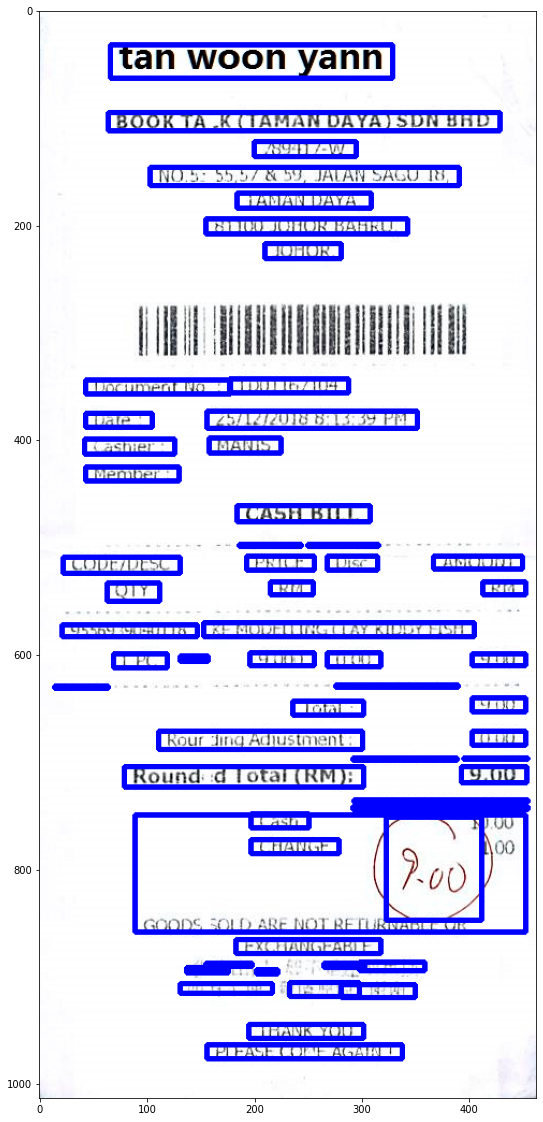

In [12]:
import cv2
image=cv2.imread("/content/gdrive/My Drive/ICDAR-2019-SROIE/data/img/000.jpg")
for  texts in data:
  coordinates=texts.split(",")[0:4]
  int_coordinates = [int(cor) for cor in coordinates]
  image = cv2.rectangle(image, (int_coordinates[0],int_coordinates[1]),(int_coordinates[2],int_coordinates[3]), (0,0,255), 3)
plt.figure(figsize = (30,20))  
plt.imshow(image)
['66', '32', '329', '63', 'tan woon yann']
d['left'][i] , d['top'][i], d['width'][i] , d['height'][i] , d['text'][i]


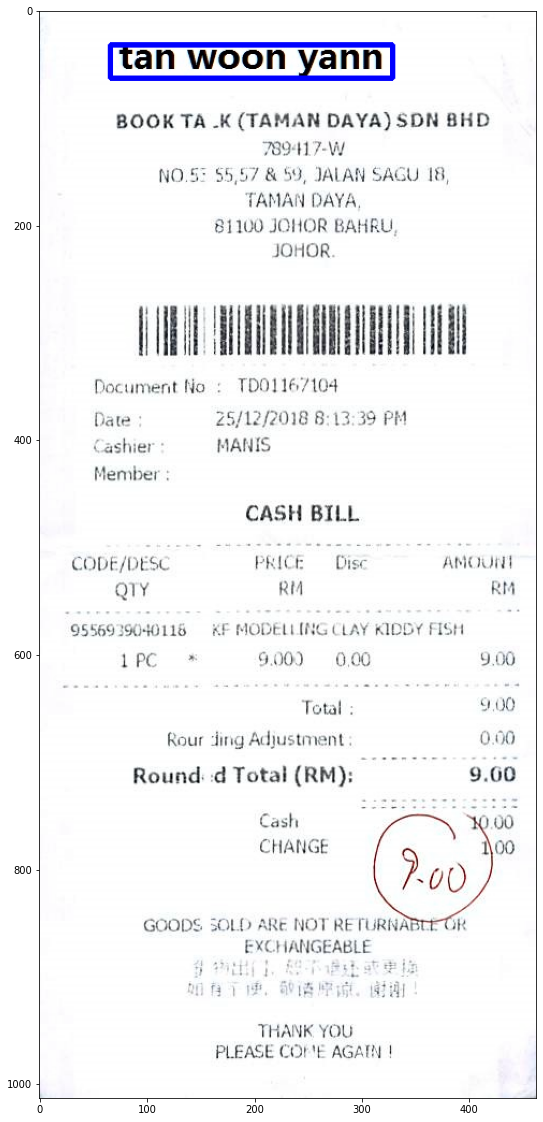

In [24]:
img1=cv2.imread("/content/gdrive/My Drive/ICDAR-2019-SROIE/data/img/000.jpg")
(x, y, w, h) = (66,32,329,63)   # left , upper, right , lower
img1 = cv2.rectangle(img1,(x, y), (w,h), (0, 0, 255), 3)
plt.figure(figsize = (30,20))
plt.imshow(img1)
#['66', '32', '329', '63', 'tan woon yann']


In [30]:
import pandas as pd
data11=pd.read_csv('/content/gdrive/My Drive/pdf/000.txt',names=[1,2,3,4,5])
data22=data11.sort_values(by=1,ascending=True)
data33=data22.sort_values(by=2,ascending=True)
data33=data33.reset_index()
data33=data33.drop('index',axis=1)
data33

,1,2,3,4,5
0,66,32,329,63,tan woon yann
1,64,95,429,112,book ta k(taman daya) sdn bhd
2,200,122,295,136,789417-w
3,103,146,391,163,ino.53 5357 & b9
4,184,170,309,184,taman daya
5,155,194,343,208,81100 johor bahru
6,210,217,281,231,johor.
7,177,343,288,356,td0116/104
8,43,344,178,357,document no :
9,156,373,352,389,25/12/2018 8:13:39 pm


In [ ]:
66,

In [7]:
for i in data:
  i=i.split(',')
  i[4]=i[4].replace('\n','')
  print(i)

['268', '508', '315', '521', 'disc']
['250', '497', '316', '499', 'iiiil']
['193', '508', '256', '521', 'price']
['215', '532', '255', '544', 'rm']
['186', '497', '244', '499', 'tt']
['184', '461', '308', '476', 'cash bill']
['413', '532', '453', '544', 'rm']
['367', '508', '450', '520', 'amouni']
['403', '671', '453', '684', '0.00']
['403', '640', '453', '653', '9.00']
['395', '696', '455', '697', 't']
['393', '704', '454', '719', '9.00']
['292', '696', '389', '698', 'iiiilln']
['276', '628', '390', '630', 'illllalil!']
['268', '598', '318', '611', '0.00']
['236', '643', '302', '656', 'total :']
['196', '598', '256', '610', '9.000)']
['153', '570', '405', '583', 'kf mooelling clay kidoy fish']
['131', '601', '157', '606', '.']
['111', '671', '301', '688', 'rour ding adjustment:']
['403', '599', '453', '610', '9.00']
['293', '735', '455', '737', 'itlllllllllllll']
['197', '748', '251', '761', 'cash']
['197', '772', '279', '785', 'change']
['292', '741', '455', '744', 't*#lnnn###i!l']
[